In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.integrals.quadrature import gauss_lobatto

In [2]:
def euclidean_distance(x,xk):
    return np.sqrt((x.reshape(-1,1)-(xk.T).reshape(1,-1))**2)

def gauss_rbf(eps,r):
    return np.exp(-(eps*r)**2)

def poly_rbf(m,r):
    if m%2 != 0:
        return r**m
    else:
        return r**(m-1) * np.log(r**r)


In [15]:
def plot_interp_gauss (eps,k):
    def true_fun(x):
        return 1/(1 + 25 * x ** 2) # Gauss function
    
    xmin = -1
    xmax = 1 # np.pi
    x = np.linspace(xmin,xmax,1000)
    y = true_fun(x)

    GLL = False
    poly_deg = 8
    if GLL:
        [xi, wgll] = gauss_lobatto(poly_deg+1,4) # GLL points
        xk = np.array(xi, dtype='float')
    else:
        xk = np.linspace(xmin,xmax,poly_deg+1)
        
    print(xk)     

    yk = true_fun(xk)
    rad = euclidean_distance(xk,xk)
    
    #Finding weights 
    
    transformation_poly = poly_rbf(k,rad)
    w_poly = np.linalg.solve(transformation_poly,yk)

    transformation_gauss = gauss_rbf(eps,rad)
    w_gauss = np.linalg.solve(transformation_gauss,yk)
    
    # after knowing the weights we can do the interpolation as follows
    # select a x vector
    
    x1 =  np.linspace(xmin,xmax,611)
    y1 = true_fun(x1)
    rad1 = euclidean_distance(x1,xk)
    print(rad1.shape)
    
    tr_gauss = gauss_rbf(eps,rad1)
    y_gauss = tr_gauss.dot(w_gauss) 
    
    tr_poly = poly_rbf(k,rad1)
    y_poly = tr_poly.dot(w_poly)
    
    plt.figure(1)
    plt.figure(figsize=(12,10))
    plt.plot(x1,y_gauss, color='green', label='Gaussian Interpolation',linewidth=3)
    plt.plot(x1,y_poly, color='blue', label='Polyharmonic Interpolation',linewidth = 3)
    plt.plot(x,y, 'k--', label='Original function',linewidth=3)
    plt.plot(xk,yk,'s', color='k', markersize=12, label='Collocation points',linewidth=3)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    # plt.legend()
    plt.tick_params(axis='both',direction='out',width=3, length=10)
    plt.tight_layout()
    plt.legend(prop={'size': 18},bbox_to_anchor =(1, 1))
    plt.title(r'Function interpolation for for f1 = $\frac{1}{1 + 25 x^2}$')
    plt.savefig('1.png')
    plt.show()
    
    error_gauss = np.sqrt((y1-y_gauss)**2)
    error_poly = np.sqrt((y1-y_poly)**2)
    
    plt.figure(2)
    plt.figure(figsize = (12,10))
    plt.plot(x1,error_gauss,'*g',label = 'Gaussian rbf')
    plt.plot(x1,error_poly,'+b',label = 'Polyharmonic rbf')
    plt.title(r"L2 error in function interpolation for f1 = $\frac{1}{1 + 25 x^2}$")
    plt.legend()
    plt.savefig('2.png')
    plt.show()

    gmax = np.max(error_gauss)
    pmax = np.max(error_poly)
    print('max error for gaussian interpolation is ',gmax)
    print('max error for polyharmonic spline interpolation is ',pmax)
    
    plt.figure(3)
    plt.figure(figsize = (12,10))
    plt.plot(x1,y1-y_gauss,'*g',label = 'Gaussian rbf')
    plt.plot(x1,y1-y_poly,'+b',label = 'Polyharmonic rbf')
    plt.title(r"L1 error in function interpolation for f1 = $\frac{1}{1 + 25 x^2}$")
    plt.legend()
    plt.savefig('5.png')
    plt.show()
    
    plt.figure(8)
    plt.figure(figsize = (12,10))
    plt.plot(x1,error_gauss,'*g',label = 'Gaussian rbf')
    #plt.plot(x1,error_poly,'+b',label = 'Polyharmonic rbf')
    plt.title(r"L2 error in function interpolation for f1 = $\frac{1}{1 + 25 x^2}$")
    plt.legend()
    plt.savefig('8.png')
    plt.show()
    


In [21]:
def plot_interp_gauss_more_nodes(eps,k):
    def true_fun(x):
        return 1/(1 + 25 * x ** 2) # Gauss function
    
    xmin = -1
    xmax = 1 # np.pi
    x = np.linspace(xmin,xmax,1000)
    y = true_fun(x)

    GLL = False
    poly_deg = 16
    if GLL:
        [xi, wgll] = gauss_lobatto(poly_deg+1,4) # GLL points
        xk = np.array(xi, dtype='float')
    else:
        xk = np.linspace(xmin,xmax,poly_deg+1)
        
    print(xk)     

    yk = true_fun(xk)
    rad = euclidean_distance(xk,xk)
    
    #Finding weights 
    
    transformation_poly = poly_rbf(k,rad)
    w_poly = np.linalg.solve(transformation_poly,yk)

    transformation_gauss = gauss_rbf(eps,rad)
    w_gauss = np.linalg.solve(transformation_gauss,yk)
    
    # after knowing the weights we can do the interpolation as follows
    # select a x vector
    
    x1 =  np.linspace(xmin,xmax,611)
    y1 = true_fun(x1)
    rad1 = euclidean_distance(x1,xk)
    print(rad1.shape)
    
    tr_gauss = gauss_rbf(eps,rad1)
    y_gauss = tr_gauss.dot(w_gauss) 
    
    tr_poly = poly_rbf(k,rad1)
    y_poly = tr_poly.dot(w_poly)
    
    plt.figure(10)
    plt.figure(figsize=(12,10))
    plt.plot(x1,y_gauss, color='green', label='Gaussian Interpolation',linewidth=3)
    plt.plot(x1,y_poly, color='blue', label='Polyharmonic Interpolation',linewidth = 3)
    plt.plot(x,y, 'k--', label='Original function',linewidth=3)
    plt.plot(xk,yk,'s', color='k', markersize=12, label='Collocation points',linewidth=3)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    # plt.legend()
    plt.tick_params(axis='both',direction='out',width=3, length=10)
    plt.tight_layout()
    plt.legend(prop={'size': 18},bbox_to_anchor =(1, 1))
    plt.title(r'Function interpolation for for f1 = $\frac{1}{1 + 25 x^2}$')
    plt.savefig('10.png')
    plt.show()
    
    error_gauss = np.sqrt((y1-y_gauss)**2)
    error_poly = np.sqrt((y1-y_poly)**2)
    
    plt.figure(11)
    plt.figure(figsize = (12,10))
    plt.plot(x1,error_gauss,'*g',label = 'Gaussian rbf')
    plt.plot(x1,error_poly,'+b',label = 'Polyharmonic rbf')
    plt.title(r"L2 error in function interpolation for f1 = $\frac{1}{1 + 25 x^2}$")
    plt.legend()
    plt.savefig('11.png')
    plt.show()

    gmax = np.max(error_gauss)
    pmax = np.max(error_poly)
    print('max error for gaussian interpolation is ',gmax)
    print('max error for polyharmonic spline interpolation is ',pmax)
    
    plt.figure(12)
    plt.figure(figsize = (12,10))
    plt.plot(x1,y1-y_gauss,'*g',label = 'Gaussian rbf')
    plt.plot(x1,y1-y_poly,'+b',label = 'Polyharmonic rbf')
    plt.title(r"L1 error in function interpolation for f1 = $\frac{1}{1 + 25 x^2}$")
    plt.legend()
    plt.savefig('12.png')
    plt.show()
    
    plt.figure(8)
    plt.figure(figsize = (12,10))
    #plt.plot(x1,error_gauss,'*g',label = 'Gaussian rbf')
    plt.plot(x1,error_poly,'+b',label = 'Polyharmonic rbf')
    plt.title(r"L2 error in function interpolation for f1 = $\frac{1}{1 + 25 x^2}$")
    plt.legend()
    plt.savefig('13.png')
    plt.show()
    


[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
(611, 9)


<Figure size 640x480 with 0 Axes>

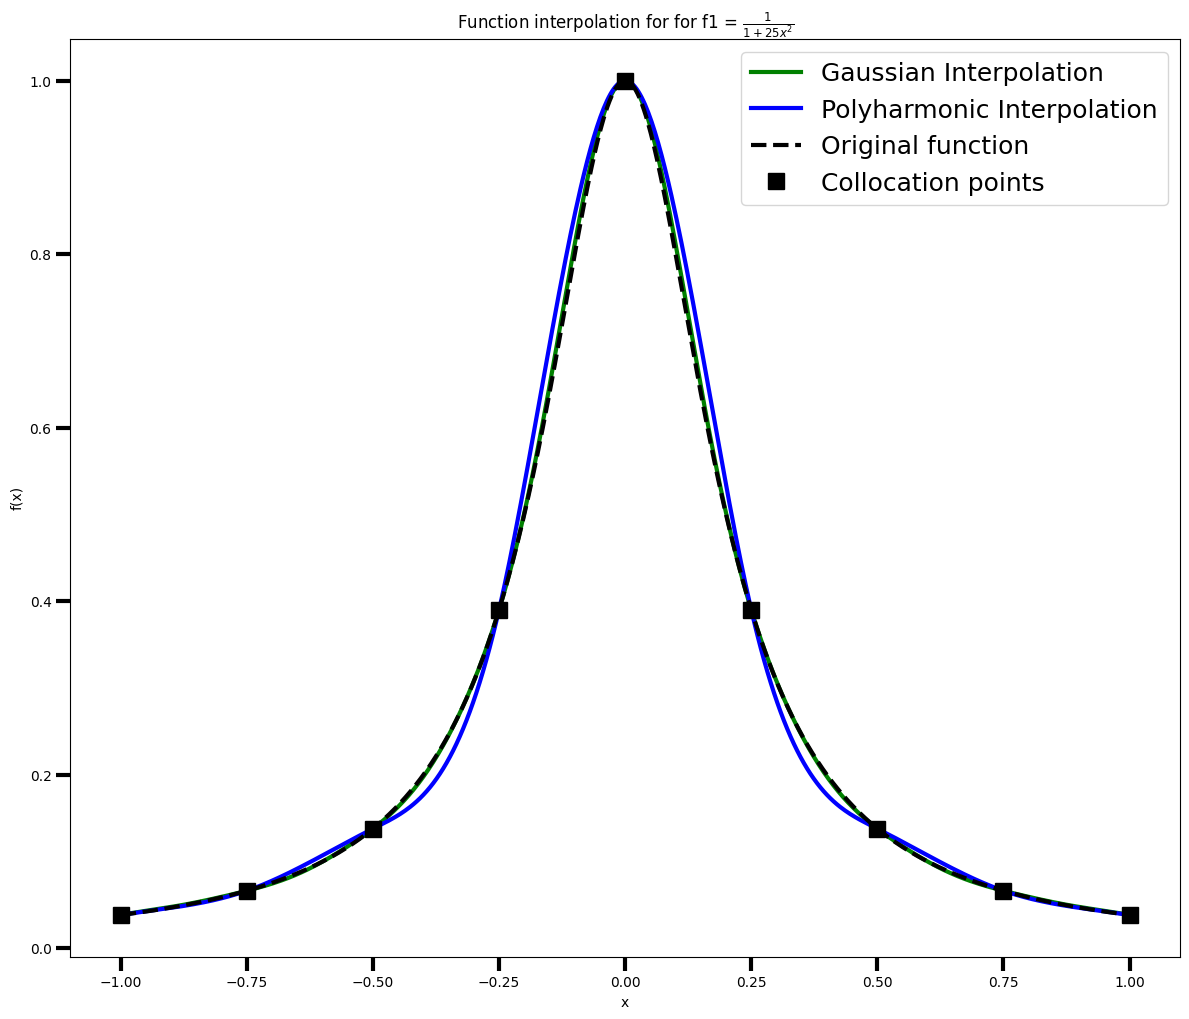

<Figure size 640x480 with 0 Axes>

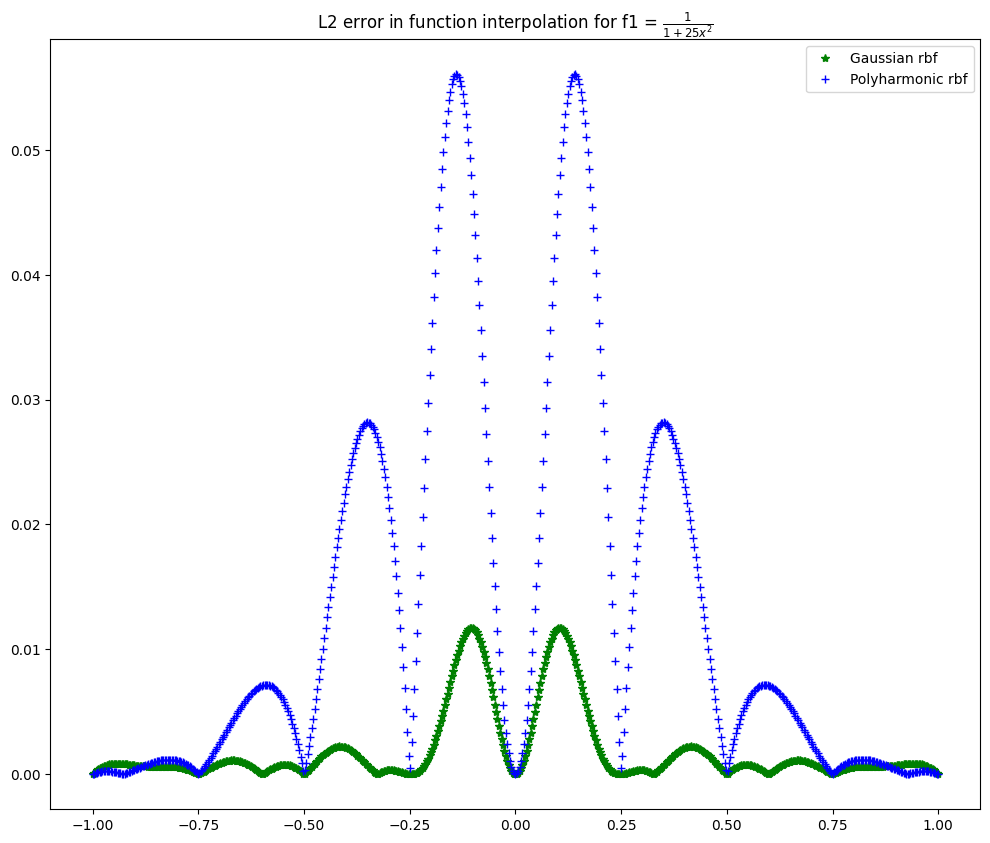

max error for gaussian interpolation is  0.011722900030529337
max error for polyharmonic spline interpolation is  0.056047344870176485


<Figure size 640x480 with 0 Axes>

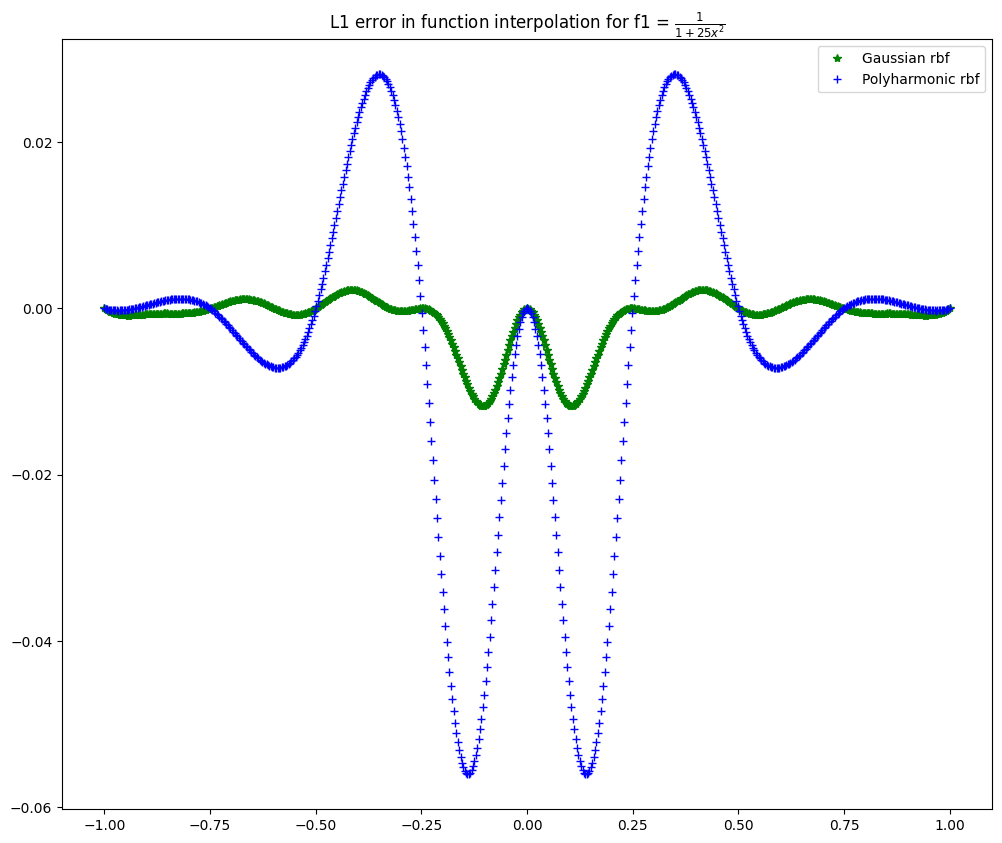

<Figure size 640x480 with 0 Axes>

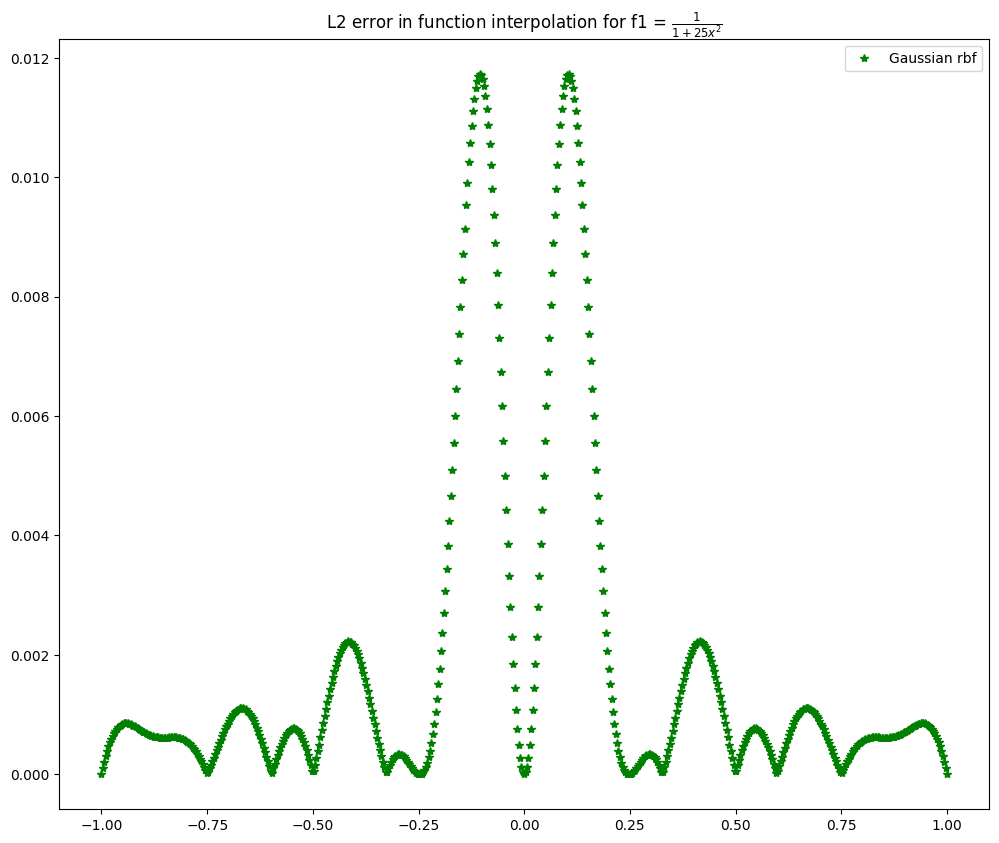

In [16]:
eps = 5.51
k = 3
plot_interp_gauss(eps,k)

[-1.    -0.875 -0.75  -0.625 -0.5   -0.375 -0.25  -0.125  0.     0.125
  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]
(611, 17)


<Figure size 640x480 with 0 Axes>

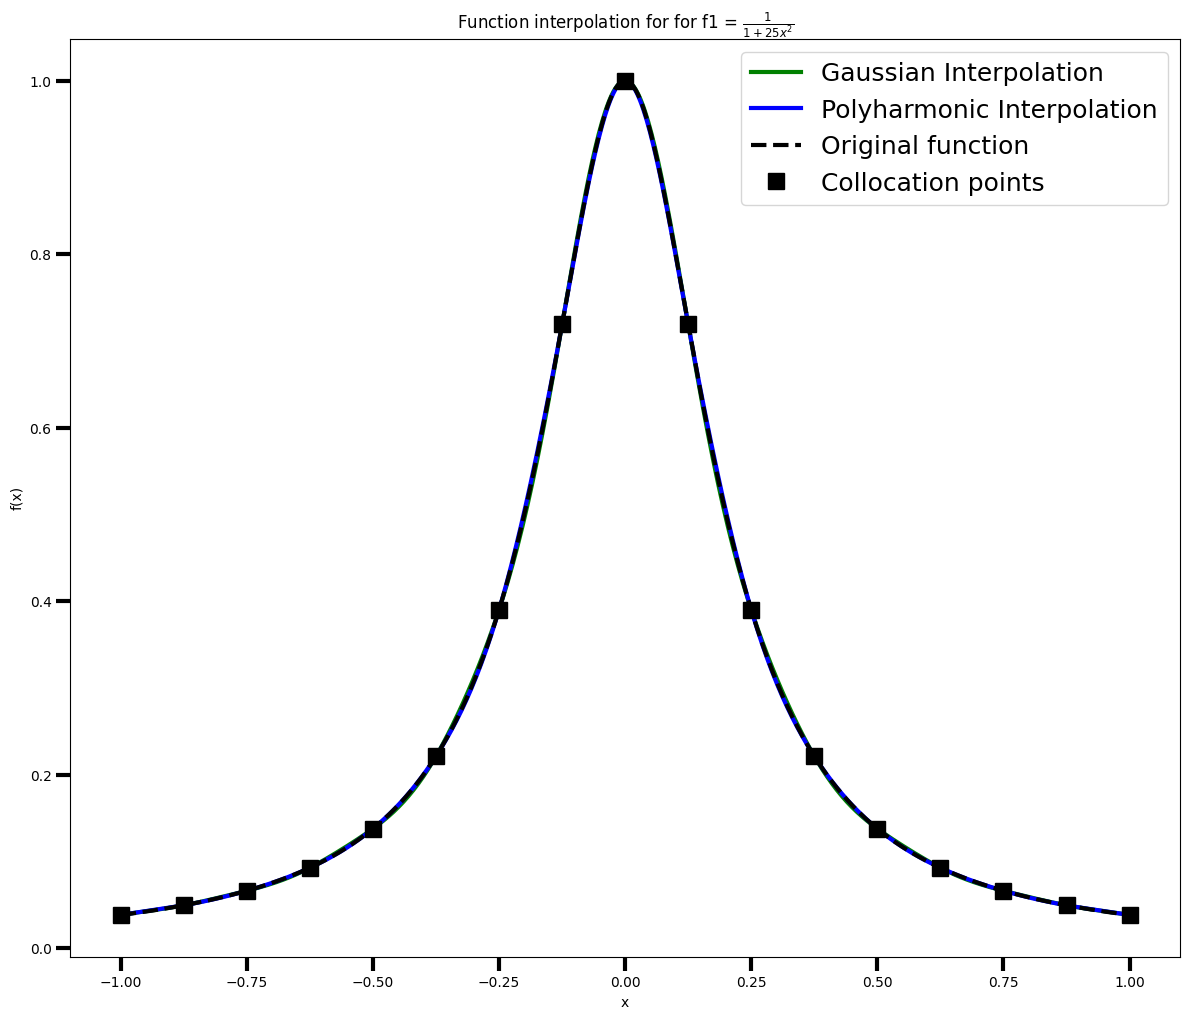

<Figure size 640x480 with 0 Axes>

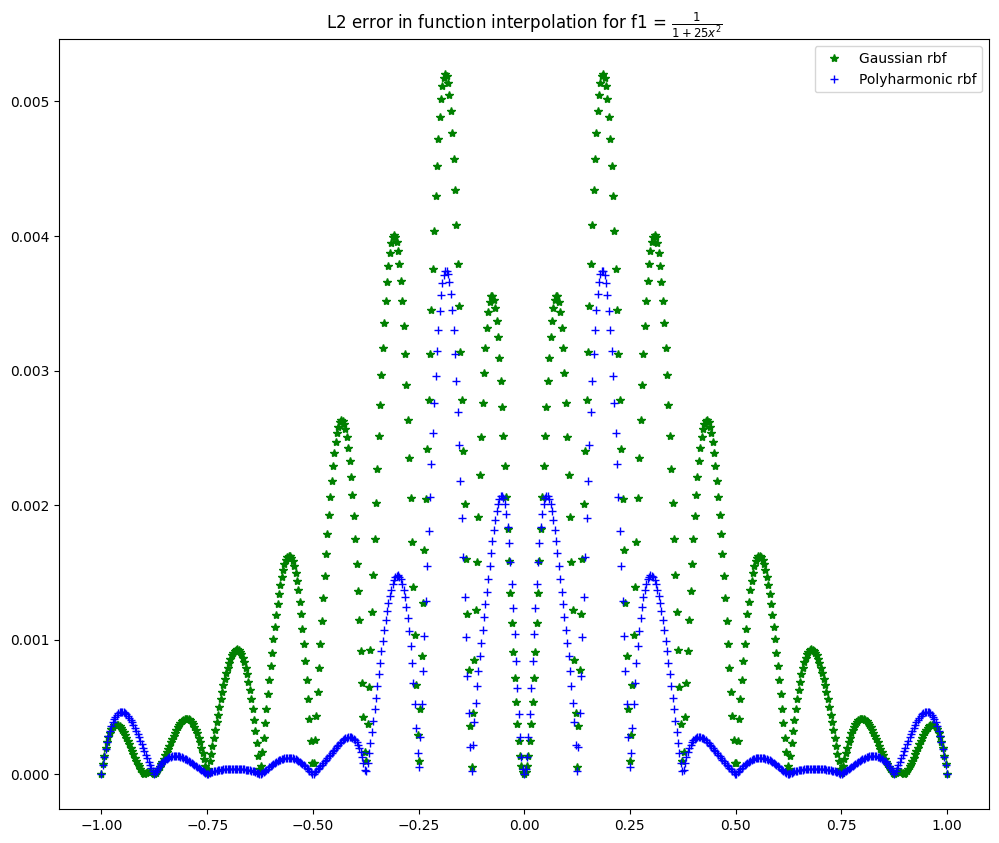

max error for gaussian interpolation is  0.005201189765995706
max error for polyharmonic spline interpolation is  0.0037427144547621527


<Figure size 640x480 with 0 Axes>

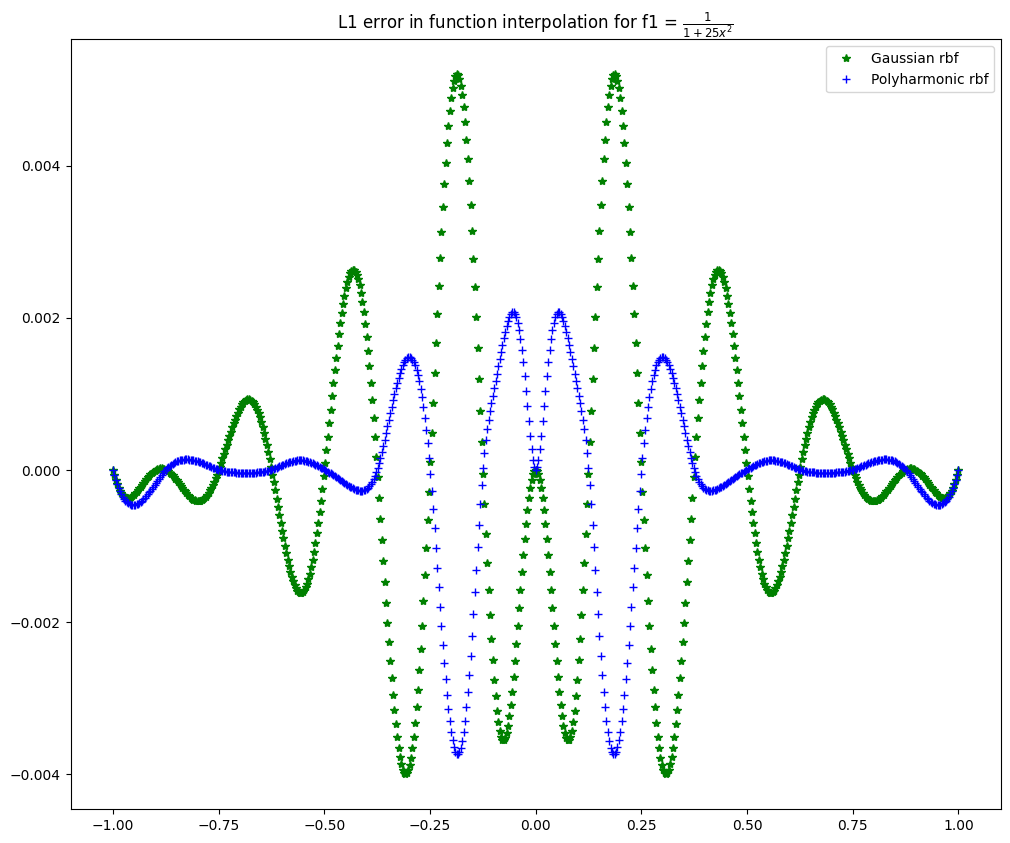

<Figure size 640x480 with 0 Axes>

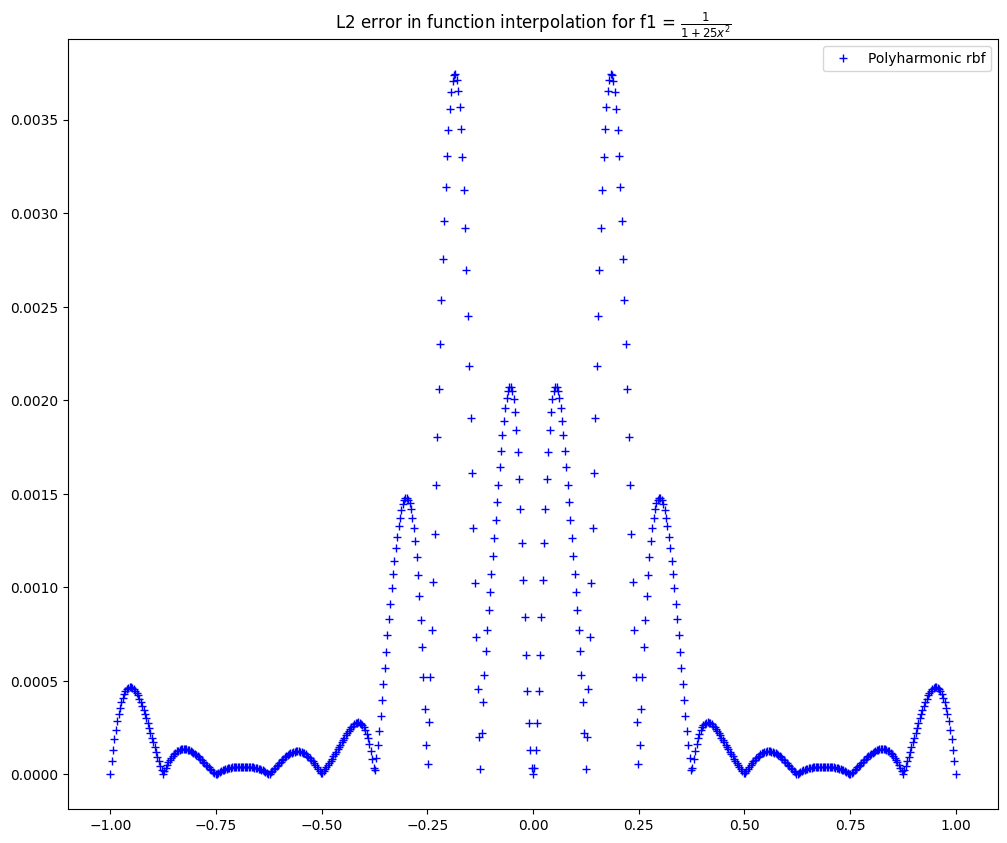

In [22]:
eps = 5.51
k = 3
plot_interp_gauss_more_nodes(eps,k)

In [ ]:
# Plot results
    font = {'size': 24}
    plt.figure(1)
    plt.rc('font', **font)  # set font size
    plt.rcParams.update({"text.usetex": True,"font.family": "serif","font.serif": ["Palatino"]})
    plt.rcParams['xtick.top'] = True
    plt.rcParams['ytick.right'] = True
    plt.rcParams['xtick.top'] = True
    plt.rcParams['ytick.right'] = True
    plt.rcParams['axes.linewidth'] = 3
    plt.figure(figsize=(10,7))
    plt.plot(x1,y_gauss, color='green', label='Interpolating function using Gaussian RBF',linewidth=3)
    plt.plot(x1,y_poly, color='blue', label='Interpolating function usingpoly harmonic RBF',linewidth=3)
    plt.plot(x,y, 'k--', label='Original function',linewidth=3)
    plt.plot(xk,yk,'s', color='k', markersize=12, label='Collocation points',linewidth=3)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.tick_params(axis='both',direction='out',width=3, length=10)
    plt.tight_layout()
    plt.title(r'Function interpolation for f1 = $\frac{1}{1 + 25 x^2}$')
    plt.legend(prop={'size': 18},bbox_to_anchor =(0.75,0.85))
    plt.savefig('1.png')
    plt.show()

In [11]:
def plot_interp_random_func (eps,k):
    
    def true_fn(x):
        return x**2 - x -np.cos(np.pi*x)
    
    xmin = -1
    xmax = 1 # np.pi
    x = np.linspace(xmin,xmax,1000)
    y = true_fn(x)

    GLL = False
    poly_deg = 8
    if GLL:
        [xi, wgll] = gauss_lobatto(poly_deg+1,4) # GLL points
        xk = np.array(xi, dtype='float')
    else:
        xk = np.linspace(xmin,xmax,poly_deg+1)

    yk = true_fn(xk)
    rad = euclidean_distance(xk,xk)
    
    #Finding weights 
    
    transformation_poly = poly_rbf(k,rad)
    w_poly = np.linalg.solve(transformation_poly,yk)

    transformation_gauss = gauss_rbf(eps,rad)
    w_gauss = np.linalg.solve(transformation_gauss,yk)
    
    # after knowing the weights we can do the interpolation as follows
    # select a x vector
    
    x1 =  np.linspace(xmin,xmax,611)
    rad1 = euclidean_distance(x1,xk)
    y1  = true_fn(x1)
    
    tr_gauss = gauss_rbf(eps,rad1)
    y_gauss = tr_gauss.dot(w_gauss) 
    
    tr_poly = poly_rbf(k,rad1)
    y_poly = tr_poly.dot(w_poly)
    
    # Plot results
    plt.figure(4)
    plt.figure(figsize=(10,5))
    plt.plot(x1,y_gauss, color='green', label='Gaussian Interpolation',linewidth=3)
    plt.plot(x1,y_poly, color='blue', label='Polyharmonic Interpolation',linewidth = 3)
    plt.plot(x,y, 'k--', label='Original function',linewidth=3)
    plt.plot(xk,yk,'s', color='k', markersize=12, label='Collocation points',linewidth=3)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    # plt.legend()
    plt.tick_params(axis='both',direction='out',width=3, length=10)
    plt.tight_layout()
    plt.legend(prop={'size': 18},bbox_to_anchor =(1, 1))
    plt.title(r'Function interpolation for f2 = $x^2 - x - cos(\pi x)$')
    plt.savefig('3.png')
    plt.show()
    
    error_gauss = np.sqrt((y1-y_gauss)**2)
    error_poly = np.sqrt((y1-y_poly)**2)
    gmax = np.max(error_gauss)
    pmax = np.max(error_poly)
    print('max error for gaussian interpolation is ')
    print('max error for polyharmonic spline interpolation is ')
    
    plt.figure(5)
    plt.figure(figsize = (10,5))
    plt.plot(x1,error_gauss,'*g',label = 'Gaussian rbf')
    plt.plot(x1,error_poly,'+b',label = 'Polyharmonic rbf')
    plt.title(r"L2 error in function interpolation for f2 = $x^2 - x - cos(\pi x)$")
    plt.legend()
    plt.savefig('4.png')
    plt.show()
    
    plt.figure(6)
    plt.figure(figsize = (12,10))
    plt.plot(x1,y1-y_gauss,'*g',label = 'Gaussian rbf')
    plt.plot(x1,y1-y_poly,'+b',label = 'Polyharmonic rbf')
    plt.title(r"L1 error in function interpolation for f1 = $\frac{1}{1 + 25 x^2}$")
    plt.legend()
    plt.savefig('6.png')
    plt.show()
    
    plt.figure(7)
    plt.figure(figsize = (12,10))
    plt.plot(x1,y1-y_gauss,'*g',label = 'Gaussian rbf')
    #plt.plot(x1,y1-y_poly,'+b',label = 'Polyharmonic rbf')
    plt.title(r"L1 error in function interpolation for f1 = $\frac{1}{1 + 25 x^2}$")
    plt.legend()
    plt.savefig('7.png')
    plt.show()

    
    


<Figure size 640x480 with 0 Axes>

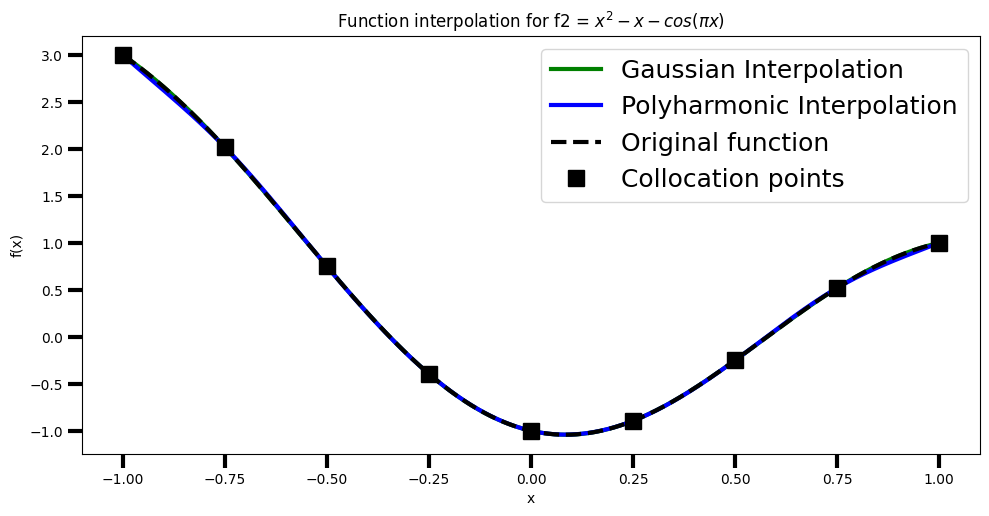

max error for gaussian interpolation is 
max error for polyharmonic spline interpolation is 


<Figure size 640x480 with 0 Axes>

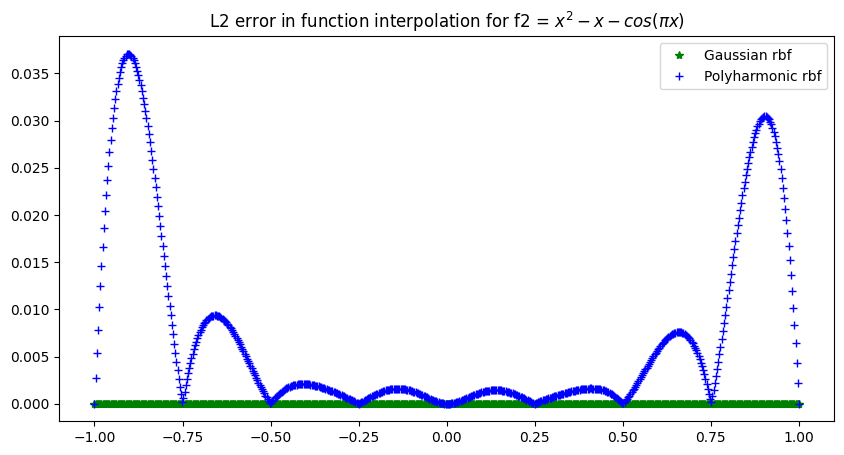

<Figure size 640x480 with 0 Axes>

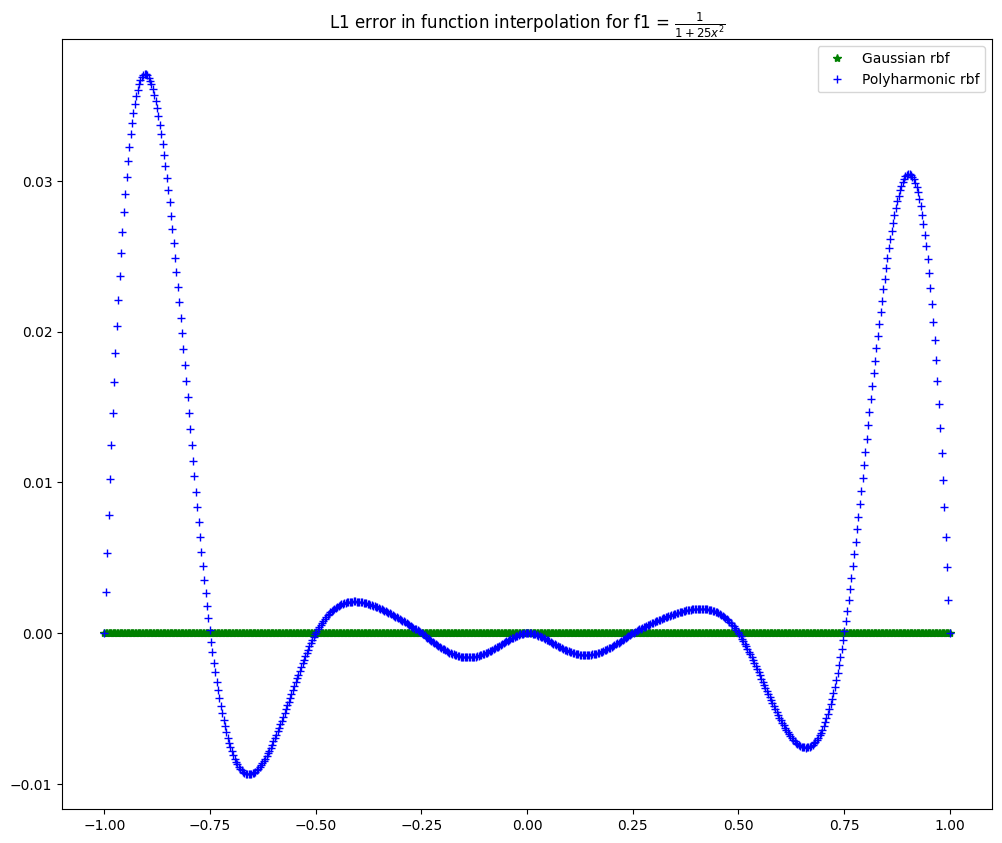

<Figure size 640x480 with 0 Axes>

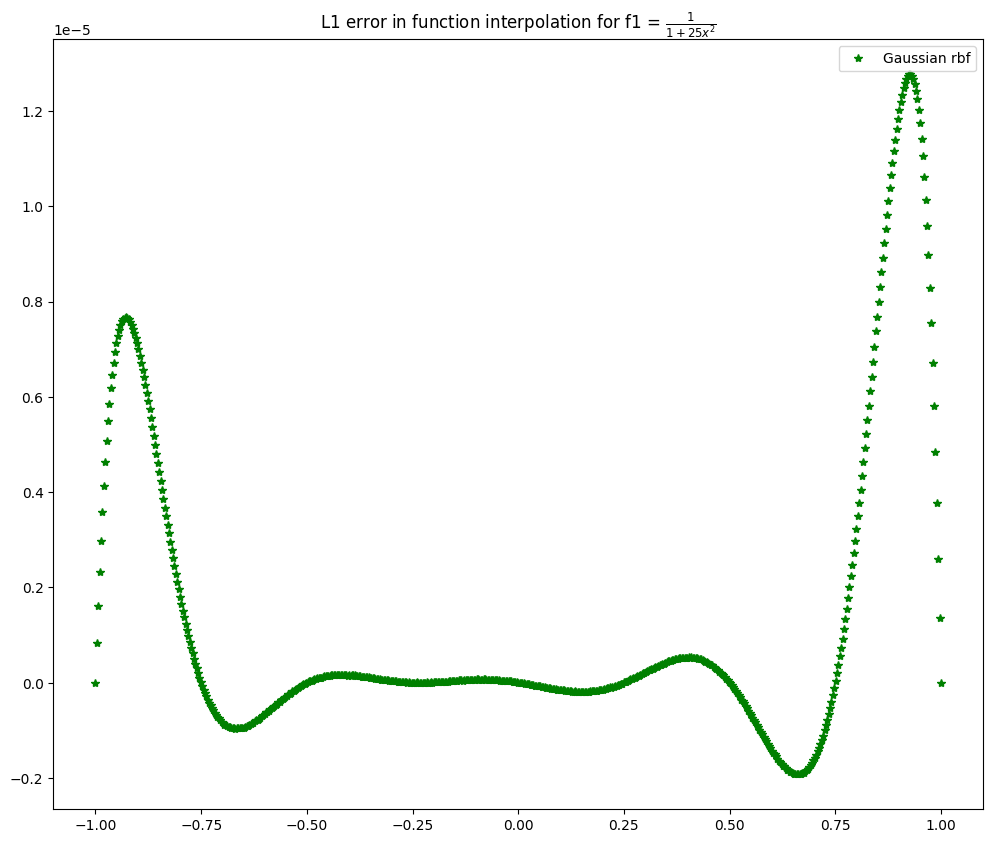

In [12]:
eps = 0.5
k = 3
plot_interp_random_func(eps,k)